In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
#Read in data from csv and store into pandas dataframe 

populations_estimates = pd.read_csv("Population-EstimatesData.csv")
populations_estimates.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2042,2043,2044,2045,2046,2047,2048,2049,2050,Unnamed: 95
0,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.201290,...,54.356396,54.502067,54.676725,54.874161,55.102246,55.331887,55.562180,55.789065,56.009450,NaN
1,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.947790,...,13.345549,13.732773,14.132766,14.544481,14.946251,15.349197,15.755873,16.168726,16.589418,NaN
2,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.872972,...,40.542064,40.345297,40.162781,39.987572,39.845466,39.699290,39.546177,39.380479,39.197560,NaN
3,Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Clean Pandas Dataframe by geting rid of unecessary columns and renaming columns

pop_est_df = populations_estimates.drop(['Country Code','Indicator Code'], axis = 1)


reg_df = pop_est_df.set_index("Country Name")


In [4]:
#filter rows in dataframe

regions_df = reg_df.loc[["Central Europe and the Baltics", "East Asia & Pacific", "European Union",
 "Latin America & Caribbean", "Middle East & North Africa", "South Asia", "Sub-Saharan Africa", "United States"]]
                                        
regions_df = regions_df.drop(regions_df.columns[[1,2,3,4,5,6,7,8,9,10,60,61,62,63,64,65,66,67,68,69,70,71,72,
73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92]], axis=1)

regions_df




,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.225484e+01,5.193307e+01,5.158214e+01,5.144332e+01,5.161769e+01,5.207665e+01,5.284028e+01,5.371526e+01,...,4.300973e+01,4.320040e+01,4.377941e+01,4.438222e+01,4.506389e+01,4.589988e+01,4.691707e+01,4.793703e+01,4.922280e+01,5.064542e+01
Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,1.474930e+01,1.508839e+01,1.541455e+01,1.574281e+01,1.607799e+01,1.646924e+01,1.688014e+01,1.723431e+01,...,2.135785e+01,2.162773e+01,2.211606e+01,2.269882e+01,2.336928e+01,2.410862e+01,2.490341e+01,2.582467e+01,2.679701e+01,2.779961e+01
Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,3.745300e+01,3.680275e+01,3.613265e+01,3.566803e+01,3.550635e+01,3.557159e+01,3.591710e+01,3.642405e+01,...,2.159023e+01,2.150695e+01,2.159585e+01,2.161505e+01,2.162610e+01,2.172330e+01,2.194739e+01,2.204940e+01,2.236748e+01,2.279319e+01
Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,Rural population growth (annual %),1.511424e-01,1.222655e+00,1.032618e+00,9.165575e-01,8.757273e-01,9.480373e-01,9.122585e-01,9.677961e-01,1.025380e+00,...,1.413321e-02,-3.034315e-02,-1.725391e-01,-1.889727e-01,-2.646566e-01,-2.546842e-01,-2.831369e-01,-3.241316e-01,-4.460271e-01,-4.902593e-01
United States,Sex ratio at birth (male births per female bir...,NaN,NaN,1.053000e+00,NaN,NaN,NaN,NaN,1.052000e+00,NaN,...,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.047000e+00,1.047000e+00,1.047000e+00,NaN
United States,Urban population,1.509224e+08,1.528655e+08,1.545317e+08,1.560350e+08,1.574885e+08,1.590706e+08,1.606111e+08,1.622567e+08,1.640051e+08,...,2.472763e+08,2.498489e+08,2.522053e+08,2.546116e+08,2.569518e+08,2.594308e+08,2.619537e+08,2.644727e+08,2.668092e+08,2.691148e+08


In [5]:
index_reset_df = regions_df.reset_index(level='Country Name')
index_reset_df 

,Country Name,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.225484e+01,5.193307e+01,5.158214e+01,5.144332e+01,5.161769e+01,5.207665e+01,5.284028e+01,...,4.300973e+01,4.320040e+01,4.377941e+01,4.438222e+01,4.506389e+01,4.589988e+01,4.691707e+01,4.793703e+01,4.922280e+01,5.064542e+01
1,Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,1.474930e+01,1.508839e+01,1.541455e+01,1.574281e+01,1.607799e+01,1.646924e+01,1.688014e+01,...,2.135785e+01,2.162773e+01,2.211606e+01,2.269882e+01,2.336928e+01,2.410862e+01,2.490341e+01,2.582467e+01,2.679701e+01,2.779961e+01
2,Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,3.745300e+01,3.680275e+01,3.613265e+01,3.566803e+01,3.550635e+01,3.557159e+01,3.591710e+01,...,2.159023e+01,2.150695e+01,2.159585e+01,2.161505e+01,2.162610e+01,2.172330e+01,2.194739e+01,2.204940e+01,2.236748e+01,2.279319e+01
3,Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,United States,Rural population growth (annual %),1.511424e-01,1.222655e+00,1.032618e+00,9.165575e-01,8.757273e-01,9.480373e-01,9.122585e-01,9.677961e-01,...,1.413321e-02,-3.034315e-02,-1.725391e-01,-1.889727e-01,-2.646566e-01,-2.546842e-01,-2.831369e-01,-3.241316e-01,-4.460271e-01,-4.902593e-01
1396,United States,Sex ratio at birth (male births per female bir...,NaN,NaN,1.053000e+00,NaN,NaN,NaN,NaN,1.052000e+00,...,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.048000e+00,1.047000e+00,1.047000e+00,1.047000e+00,NaN
1397,United States,Urban population,1.509224e+08,1.528655e+08,1.545317e+08,1.560350e+08,1.574885e+08,1.590706e+08,1.606111e+08,1.622567e+08,...,2.472763e+08,2.498489e+08,2.522053e+08,2.546116e+08,2.569518e+08,2.594308e+08,2.619537e+08,2.644727e+08,2.668092e+08,2.691148e+08
1398,United States,Urban population (% of total population),7.360200e+01,7.361300e+01,7.362300e+01,7.363300e+01,7.364300e+01,7.365300e+01,7.366300e+01,7.367300e+01,...,8.060600e+01,8.077200e+01,8.094400e+01,8.111900e+01,8.129900e+01,8.148300e+01,8.167100e+01,8.186200e+01,8.205800e+01,8.225600e+01


In [6]:
# Create Dataframe showing popualtion annnual perecent growth for 8 selected regions


pop_df = index_reset_df.set_index("Indicator Name")

pop_df.head()

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Age dependency ratio (% of working-age population),Central Europe and the Baltics,52.375566,52.254844,51.933073,51.582140,51.443323,51.617688,52.076651,52.840284,53.715259,...,43.009734,43.200405,43.779407,44.382225,45.063891,45.899876,46.917068,47.937029,49.222801,50.645418
"Age dependency ratio, old",Central Europe and the Baltics,14.387453,14.749303,15.088387,15.414548,15.742809,16.077992,16.469243,16.880140,17.234313,...,21.357849,21.627734,22.116059,22.698818,23.369281,24.108615,24.903405,25.824670,26.797009,27.799608
"Age dependency ratio, young",Central Europe and the Baltics,37.922797,37.452995,36.802752,36.132650,35.668026,35.506350,35.571588,35.917100,36.424053,...,21.590227,21.506953,21.595850,21.615052,21.626101,21.723296,21.947391,22.049400,22.367483,22.793186
"Age population, age 00, female, interpolated",Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Age population, age 00, male, interpolated",Central Europe and the Baltics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pop_growth_df = pop_df.loc[["Population growth (annual %)"]]

pop_growth_df

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Population growth (annual %),Central Europe and the Baltics,0.535378,0.505081,0.724546,0.752830,0.818133,0.903135,0.890037,0.810221,0.681069,...,-0.191814,-0.361666,-0.236933,-0.229155,-0.213202,-0.209757,-0.230374,-0.255098,-0.248061,-0.220882
Population growth (annual %),East Asia & Pacific,2.618716,2.611676,2.405449,2.231214,2.169160,1.913620,1.677328,1.559071,1.528258,...,0.686240,0.676314,0.670107,0.681736,0.680785,0.685391,0.678000,0.685905,0.682526,0.605775
Population growth (annual %),European Union,0.529373,0.520838,0.628614,0.590098,0.547030,0.522583,0.471481,0.423382,0.403230,...,0.301066,0.219539,-0.058077,0.216334,0.297263,0.315074,0.299831,0.294467,0.190245,0.199587
Population growth (annual %),Latin America & Caribbean,2.504952,2.471871,2.436539,2.405990,2.377988,2.351783,2.324954,2.297114,2.275402,...,1.160247,1.123295,1.128726,1.108944,1.087783,1.060012,1.032471,1.003880,0.974580,0.941967
Population growth (annual %),Middle East & North Africa,2.797881,2.769358,2.744408,2.789692,2.806212,2.852580,2.904023,2.952797,3.020863,...,2.179620,2.126021,2.079883,2.038280,1.991087,1.940194,1.887753,1.826082,1.766063,1.735419
Population growth (annual %),South Asia,2.293981,2.297328,2.301589,2.311283,2.328211,2.349077,2.368629,2.383444,2.394054,...,1.482363,1.434921,1.387697,1.336880,1.308090,1.282054,1.260453,1.243278,1.223397,1.202181
Population growth (annual %),Sub-Saharan Africa,2.630388,2.670286,2.707220,2.742497,2.776397,2.807818,2.836985,2.862368,2.879602,...,2.759570,2.763525,2.764139,2.763665,2.758347,2.748419,2.734757,2.719155,2.701850,2.680831
Population growth (annual %),United States,1.165003,1.264334,1.070523,0.954477,0.913660,0.985986,0.950220,1.005772,1.059573,...,0.876651,0.829275,0.726014,0.733617,0.693255,0.734093,0.737335,0.723401,0.640459,0.619431


##Regional Populations Growth Graph

*Creating a line graph showing European Union, Central Europe and the Baltics, Sub Saharan Africa, United States, Latin America and Caribbean, Middle East and North Africa, East Asia and Pacific, South Asia - Population growth (annual %) 1970-2050.

In [8]:
# Reset index to country name
pop_growth_df = pop_growth_df.set_index('Country Name')

pop_growth_df

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,0.535378,0.505081,0.724546,0.752830,0.818133,0.903135,0.890037,0.810221,0.681069,0.587888,...,-0.191814,-0.361666,-0.236933,-0.229155,-0.213202,-0.209757,-0.230374,-0.255098,-0.248061,-0.220882
East Asia & Pacific,2.618716,2.611676,2.405449,2.231214,2.169160,1.913620,1.677328,1.559071,1.528258,1.533651,...,0.686240,0.676314,0.670107,0.681736,0.680785,0.685391,0.678000,0.685905,0.682526,0.605775
European Union,0.529373,0.520838,0.628614,0.590098,0.547030,0.522583,0.471481,0.423382,0.403230,0.397544,...,0.301066,0.219539,-0.058077,0.216334,0.297263,0.315074,0.299831,0.294467,0.190245,0.199587
Latin America & Caribbean,2.504952,2.471871,2.436539,2.405990,2.377988,2.351783,2.324954,2.297114,2.275402,2.255746,...,1.160247,1.123295,1.128726,1.108944,1.087783,1.060012,1.032471,1.003880,0.974580,0.941967
Middle East & North Africa,2.797881,2.769358,2.744408,2.789692,2.806212,2.852580,2.904023,2.952797,3.020863,3.124459,...,2.179620,2.126021,2.079883,2.038280,1.991087,1.940194,1.887753,1.826082,1.766063,1.735419
South Asia,2.293981,2.297328,2.301589,2.311283,2.328211,2.349077,2.368629,2.383444,2.394054,2.399473,...,1.482363,1.434921,1.387697,1.336880,1.308090,1.282054,1.260453,1.243278,1.223397,1.202181
Sub-Saharan Africa,2.630388,2.670286,2.707220,2.742497,2.776397,2.807818,2.836985,2.862368,2.879602,2.891320,...,2.759570,2.763525,2.764139,2.763665,2.758347,2.748419,2.734757,2.719155,2.701850,2.680831
United States,1.165003,1.264334,1.070523,0.954477,0.913660,0.985986,0.950220,1.005772,1.059573,1.103577,...,0.876651,0.829275,0.726014,0.733617,0.693255,0.734093,0.737335,0.723401,0.640459,0.619431


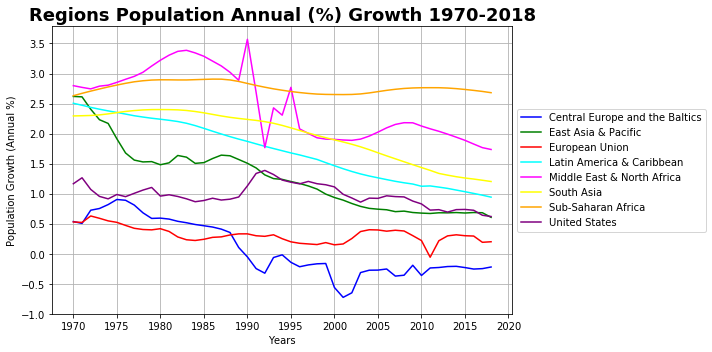

In [9]:
#Create Line Graph using matplotlib

reg_1 = pop_growth_df.loc["Central Europe and the Baltics"]
reg_2 = pop_growth_df.loc["East Asia & Pacific"]
reg_3 = pop_growth_df.loc["European Union"]
reg_4 = pop_growth_df.loc["Latin America & Caribbean"]
reg_5 = pop_growth_df.loc["Middle East & North Africa"]
reg_6 = pop_growth_df.loc["South Asia"]
reg_7 = pop_growth_df.loc["Sub-Saharan Africa"]
reg_8 = pop_growth_df.loc["United States"]

years = [1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,
     1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,
    2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

plt.figure(figsize=(10,5))

plt.plot(years, reg_1, color="blue", label="Central Europe and the Baltics")
plt.plot(years, reg_2, color="green", label="East Asia & Pacific")
plt.plot(years, reg_3, color="red", label="European Union")
plt.plot(years, reg_4, color="cyan", label="Latin America & Caribbean")
plt.plot(years, reg_5, color="magenta", label="Middle East & North Africa")
plt.plot(years, reg_6, color="yellow", label="South Asia")
plt.plot(years, reg_7, color="orange", label="Sub-Saharan Africa")
plt.plot(years, reg_8, color="purple", label="United States")


plt.title('Regions Population Annual (%) Growth 1970-2018', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.ylabel('Population Growth (Annual %)')
plt.yticks(np.arange(-1, 4, 0.5))
plt.xlabel('Years')
plt.xticks(np.arange(1970,2025,5))
legend = plt.legend(loc="best")
legend.get_frame().set_facecolor('none')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.tight_layout()
plt.savefig("Regions_Population_Growth.png")
plt.show()


##Regional Population Age Groups 1970 & 2020

*Creating multiple bar charts comparing 3 Age Groups in 1970 & 2020 showing the European Union, Central Europe and the Baltics, Sub Saharan Africa, United States, Latin America and Caribbean, Middle East and North Africa, East Asia and Pacific, South Asia Population regions by ages 0-14 (% of total population), Population ages 15-64 (% of total population), Population ages 65 and above (% of total population). 

In [10]:
#Start filtering dataframes for pie chart
filter_df = populations_estimates[["Country Name", "Indicator Name", "1970", "2020"]]
filter_df.head()

,Country Name,Indicator Name,1970,2020
0,Arab World,Age dependency ratio (% of working-age populat...,94.226666,61.020120
1,Arab World,"Age dependency ratio, old",7.073558,7.593050
2,Arab World,"Age dependency ratio, young",86.848912,51.954725
3,Arab World,"Age population, age 00, female, interpolated",NaN,NaN
4,Arab World,"Age population, age 00, male, interpolated",NaN,NaN


In [11]:
# Reset index to country name
filtered_df = filter_df.set_index('Country Name')

filtered_df



,Indicator Name,1970,2020
Country Name,,,
Arab World,Age dependency ratio (% of working-age populat...,94.226666,6.102012e+01
Arab World,"Age dependency ratio, old",7.073558,7.593050e+00
Arab World,"Age dependency ratio, young",86.848912,5.195473e+01
Arab World,"Age population, age 00, female, interpolated",NaN,NaN
Arab World,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...
Zimbabwe,Rural population growth (annual %),2.840977,NaN
Zimbabwe,Sex ratio at birth (male births per female bir...,NaN,NaN
Zimbabwe,Urban population,918329.000000,4.792000e+06


In [12]:
regions_pie_df = filtered_df.loc[["Central Europe and the Baltics", "East Asia & Pacific", "European Union",
 "Latin America & Caribbean", "Middle East & North Africa", "South Asia", "Sub-Saharan Africa", "United States"]]

regions_pie_df

,Indicator Name,1970,2020
Country Name,,,
Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.316262e+01
Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,2.976632e+01
Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,2.335613e+01
Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN
Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...
United States,Rural population growth (annual %),1.511424e-01,NaN
United States,Sex ratio at birth (male births per female bir...,NaN,NaN
United States,Urban population,1.509224e+08,2.743740e+08


In [13]:
in_reset_df = regions_pie_df.reset_index(level='Country Name')
in_reset_df 

,Country Name,Indicator Name,1970,2020
0,Central Europe and the Baltics,Age dependency ratio (% of working-age populat...,5.237557e+01,5.316262e+01
1,Central Europe and the Baltics,"Age dependency ratio, old",1.438745e+01,2.976632e+01
2,Central Europe and the Baltics,"Age dependency ratio, young",3.792280e+01,2.335613e+01
3,Central Europe and the Baltics,"Age population, age 00, female, interpolated",NaN,NaN
4,Central Europe and the Baltics,"Age population, age 00, male, interpolated",NaN,NaN
...,...,...,...,...
1395,United States,Rural population growth (annual %),1.511424e-01,NaN
1396,United States,Sex ratio at birth (male births per female bir...,NaN,NaN
1397,United States,Urban population,1.509224e+08,2.743740e+08
1398,United States,Urban population (% of total population),7.360200e+01,8.266400e+01


In [14]:
# Set index to filter 

set_df = in_reset_df.set_index("Indicator Name")

set_df.head()

,Country Name,1970,2020
Indicator Name,,,
Age dependency ratio (% of working-age population),Central Europe and the Baltics,52.375566,53.162625
"Age dependency ratio, old",Central Europe and the Baltics,14.387453,29.766316
"Age dependency ratio, young",Central Europe and the Baltics,37.922797,23.356127
"Age population, age 00, female, interpolated",Central Europe and the Baltics,NaN,NaN
"Age population, age 00, male, interpolated",Central Europe and the Baltics,NaN,NaN


In [15]:

clean_df = set_df.loc[["Population ages 0-14 (% of total population)"]]

bar_1 = clean_df.drop(clean_df.columns[[2]], axis=1)

adjust_i = bar_1.reset_index(level='Indicator Name')

bar_graph = adjust_i.drop(adjust_i.columns[[0]], axis=1)

sort_df = bar_graph.sort_values("1970", ascending=False)
sort_df 

,Country Name,1970
4,Middle East & North Africa,44.265381
6,Sub-Saharan Africa,44.175179
3,Latin America & Caribbean,42.375972
5,South Asia,41.423477
1,East Asia & Pacific,39.743191
7,United States,28.097460
0,Central Europe and the Baltics,24.898388
2,European Union,24.823173


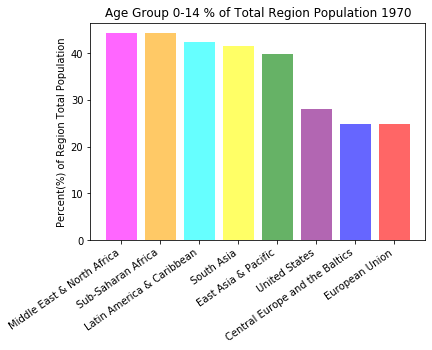

In [16]:
#Start plotting first bar graph

x_axis = np.arange(len(sort_df))
tic_locs = [value for value in x_axis]

plt.bar(x_axis, sort_df["1970"], color=['magenta', 'orange', 'cyan', 'yellow', 'green', 'purple', 'blue', 'red']
        , alpha=0.6, align="center")
plt.xticks(tic_locs, sort_df["Country Name"], rotation=35, ha='right')
plt.ylabel('Percent(%) of Region Total Population')
plt.title('Age Group 0-14 % of Total Region Population 1970')

plt.savefig("bar_graph1.png")
plt.show()



In [17]:
#Start creating graph #2 

clean2_df = set_df.loc[["Population ages 15-64 (% of total population)"]]

adjust2_i = clean2_df.reset_index(level='Indicator Name')

bar2_graph = adjust2_i.drop(adjust2_i.columns[[0,3]], axis=1)

sort2_df = bar2_graph.sort_values("1970", ascending=False)
sort2_df 

,Country Name,1970
0,Central Europe and the Baltics,65.655462
2,European Union,63.599517
7,United States,61.851725
1,East Asia & Pacific,56.257719
5,South Asia,55.290063
3,Latin America & Caribbean,53.696043
6,Sub-Saharan Africa,52.831056
4,Middle East & North Africa,52.012876


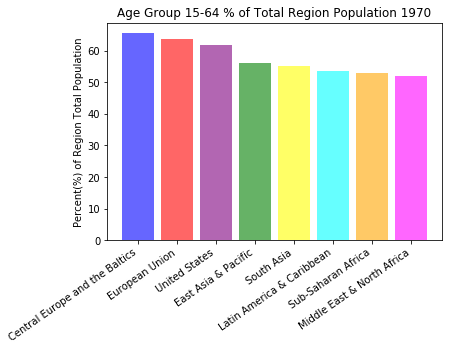

In [18]:
x_axis = np.arange(len(sort2_df))
tic_locs = [value for value in x_axis]

plt.bar(x_axis, sort2_df["1970"], color=['blue', 'red', 'purple', 'green', 'yellow', 'cyan', 'orange', 'magenta']
        , alpha=0.6, align="center")
plt.xticks(tic_locs, sort2_df["Country Name"], rotation=35, ha='right')
plt.ylabel('Percent(%) of Region Total Population')
plt.title('Age Group 15-64 % of Total Region Population 1970')


plt.savefig("bar_graph2.png")
plt.show()

In [19]:
#Start creating graph #3

clean3_df = set_df.loc[["Population ages 65 and above (% of total population)"]]

adjust3_i = clean3_df.reset_index(level='Indicator Name')

bar3_graph = adjust3_i.drop(adjust3_i.columns[[0,3]], axis=1)

sort3_df = bar3_graph.sort_values("1970", ascending=False)
sort3_df 

,Country Name,1970
2,European Union,11.577310
7,United States,10.050815
0,Central Europe and the Baltics,9.446150
1,East Asia & Pacific,3.999090
3,Latin America & Caribbean,3.927985
4,Middle East & North Africa,3.721743
5,South Asia,3.286460
6,Sub-Saharan Africa,2.993765


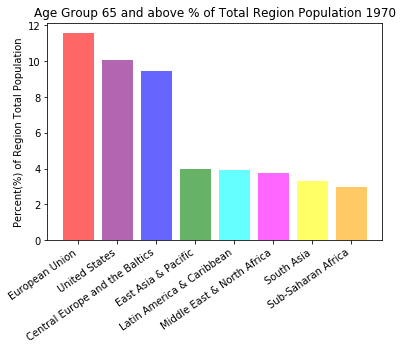

In [20]:
x_axis = np.arange(len(sort3_df))
tic_locs = [value for value in x_axis]

plt.bar(x_axis, sort3_df["1970"], color=['red', 'purple', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'orange']
        , alpha=0.6, align="center")
plt.xticks(tic_locs, sort3_df["Country Name"], rotation=35, ha='right')
plt.ylabel('Percent(%) of Region Total Population')
plt.title('Age Group 65 and above % of Total Region Population 1970')


plt.savefig("bar_graph3.png")
plt.show()

In [21]:
#Start creating graph #4

clean4_df = set_df.loc[["Population ages 0-14 (% of total population)"]]

adjust4_i = clean4_df.reset_index(level='Indicator Name')

bar4_graph = adjust4_i.drop(adjust4_i.columns[[0,2]], axis=1)

sort4_df = bar4_graph.sort_values("2020", ascending=False)
sort4_df 





,Country Name,2020
6,Sub-Saharan Africa,42.005368
4,Middle East & North Africa,29.805950
5,South Asia,27.581763
3,Latin America & Caribbean,23.896601
1,East Asia & Pacific,19.516545
7,United States,18.371747
2,European Union,15.419252
0,Central Europe and the Baltics,15.253229


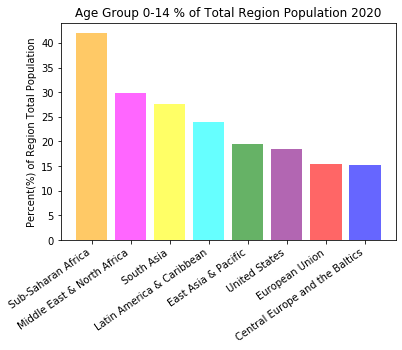

In [22]:
x_axis = np.arange(len(sort4_df))
tic_locs = [value for value in x_axis]

plt.bar(x_axis, sort4_df["2020"], color=['orange', 'magenta', 'yellow', 'cyan', 'green', 'purple', 'red', 'blue']
        , alpha=0.6, align="center")
plt.xticks(tic_locs, sort4_df["Country Name"], rotation=35, ha='right')
plt.ylabel('Percent(%) of Region Total Population')
plt.title('Age Group 0-14 % of Total Region Population 2020')


plt.savefig("bar_graph4.png")
plt.show()

In [23]:
#Start creating graph #5

clean5_df = set_df.loc[["Population ages 15-64 (% of total population)"]]

adjust5_i = clean5_df.reset_index(level='Indicator Name')

bar5_graph = adjust5_i.drop(adjust5_i.columns[[0,2]], axis=1)

sort5_df = bar5_graph.sort_values("2020", ascending=False)
sort5_df 

,Country Name,2020
1,East Asia & Pacific,68.897939
3,Latin America & Caribbean,67.141503
5,South Asia,66.268750
0,Central Europe and the Baltics,65.307219
7,United States,64.997327
4,Middle East & North Africa,64.755411
2,European Union,64.073949
6,Sub-Saharan Africa,54.973417


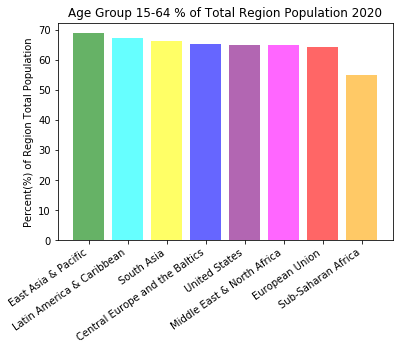

In [24]:
x_axis = np.arange(len(sort5_df))
tic_locs = [value for value in x_axis]

plt.bar(x_axis, sort5_df["2020"], color=['green', 'cyan', 'yellow', 'blue', 'purple', 'magenta', 'red', 'orange']
        , alpha=0.6, align="center")
plt.xticks(tic_locs, sort5_df["Country Name"], rotation=35, ha='right')
plt.ylabel('Percent(%) of Region Total Population')
plt.title('Age Group 15-64 % of Total Region Population 2020')


plt.savefig("bar_graph5.png")
plt.show()

In [25]:
clean6_df = set_df.loc[["Population ages 65 and above (% of total population)"]]

adjust6_i = clean6_df.reset_index(level='Indicator Name')

bar6_graph = adjust6_i.drop(adjust5_i.columns[[0,2]], axis=1)

sort6_df = bar6_graph.sort_values("2020", ascending=False)
sort6_df 



,Country Name,2020
2,European Union,20.506799
0,Central Europe and the Baltics,19.439552
7,United States,16.630926
1,East Asia & Pacific,11.585516
3,Latin America & Caribbean,8.961896
5,South Asia,6.149487
4,Middle East & North Africa,5.438639
6,Sub-Saharan Africa,3.021216


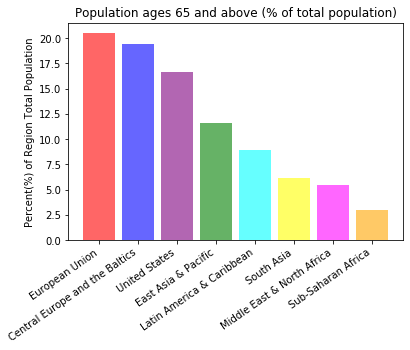

In [26]:
x_axis = np.arange(len(sort6_df))
tic_locs = [value for value in x_axis]

plt.bar(x_axis, sort6_df["2020"], color=['red', 'blue', 'purple', 'green', 'cyan', 'yellow', 'magenta', 'orange']
        , alpha=0.6, align="center")
plt.xticks(tic_locs, sort6_df["Country Name"], rotation=35, ha='right')
plt.ylabel('Percent(%) of Region Total Population')
plt.title('Population ages 65 and above (% of total population)')


plt.savefig("bar_graph6.png")
plt.show()
